In [1]:
import numpy as np

arm_probabilities = [0.9, 0.1, 0.5]

In [2]:
import math

def ucb_algorithm(num_arms, num_rounds, probabilities):
    n_plays = [0] * num_arms
    rewards = [0] * num_arms
    selected_arms = []
    cumulative_rewards = []
    total_reward = 0

    for round_num in range(1, num_rounds + 1):
        ucb_values = []
        for arm in range(num_arms):
            if n_plays[arm] == 0:
                ucb_values.append(float('inf'))
            else:
                average_reward = rewards[arm] / n_plays[arm]
                confidence_bound = math.sqrt(2 * math.log(round_num) / n_plays[arm])
                ucb_values.append(average_reward + confidence_bound)

        selected_arm = ucb_values.index(max(ucb_values))
        selected_arms.append(selected_arm)

        reward = np.random.binomial(1, probabilities[selected_arm])
        rewards[selected_arm] += reward
        n_plays[selected_arm] += 1
        total_reward += reward
        cumulative_rewards.append(total_reward)

    return selected_arms, cumulative_rewards


In [3]:
def thompson_sampling(num_arms, num_rounds, probabilities):
    alpha = [1] * num_arms
    beta = [1] * num_arms
    selected_arms = []
    cumulative_rewards = []
    total_reward = 0

    for round_num in range(num_rounds):
        sample_values = [np.random.beta(alpha[arm], beta[arm]) for arm in range(num_arms)]
        selected_arm = sample_values.index(max(sample_values))
        selected_arms.append(selected_arm)

        reward = np.random.binomial(1, probabilities[selected_arm])

        if reward == 1:
            alpha[selected_arm] += 1
        else:
            beta[selected_arm] += 1

        total_reward += reward
        cumulative_rewards.append(total_reward)

    return selected_arms, cumulative_rewards

In [4]:
num_rounds = 1000

ucb_selected_arms, ucb_cumulative_rewards = ucb_algorithm(len(arm_probabilities), num_rounds, arm_probabilities)

ts_selected_arms, ts_cumulative_rewards = thompson_sampling(len(arm_probabilities), num_rounds, arm_probabilities)

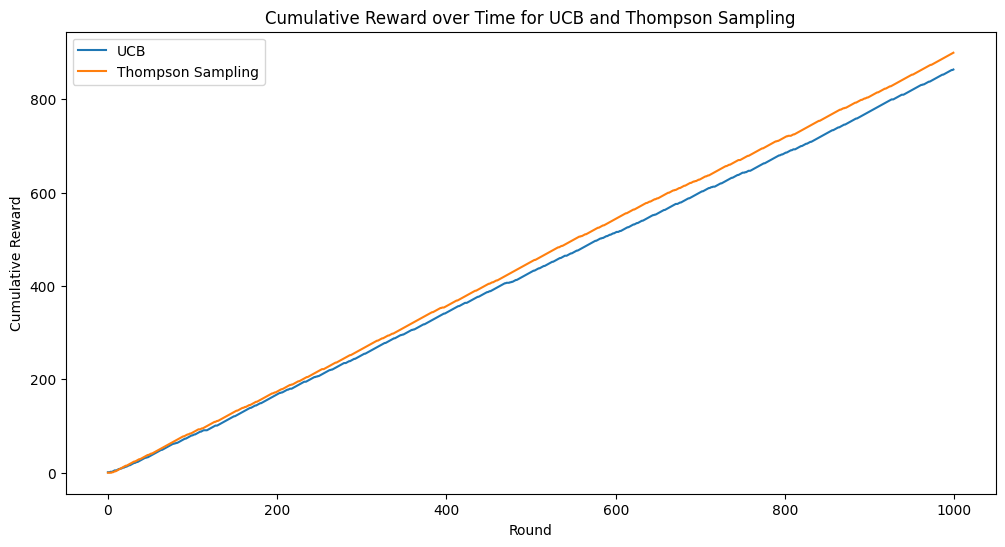

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(ucb_cumulative_rewards, label='UCB')
plt.plot(ts_cumulative_rewards, label='Thompson Sampling')

plt.title('Cumulative Reward over Time for UCB and Thompson Sampling')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')

plt.legend()

plt.show()

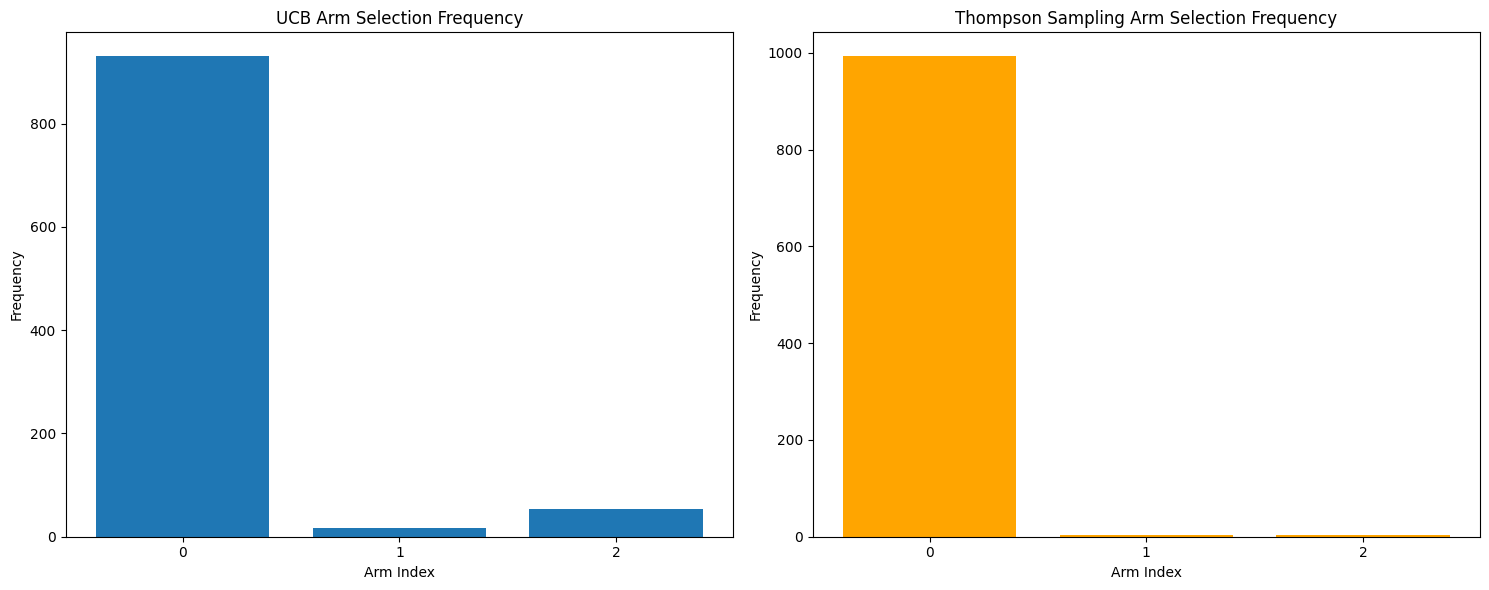

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ucb_arm_counts = pd.Series(ucb_selected_arms).value_counts().sort_index()
ts_arm_counts = pd.Series(ts_selected_arms).value_counts().sort_index()

axes[0].bar(ucb_arm_counts.index, ucb_arm_counts.values)
axes[0].set_xlabel('Arm Index')
axes[0].set_ylabel('Frequency')
axes[0].set_title('UCB Arm Selection Frequency')
axes[0].set_xticks(ucb_arm_counts.index)

axes[1].bar(ts_arm_counts.index, ts_arm_counts.values, color='orange')
axes[1].set_xlabel('Arm Index')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Thompson Sampling Arm Selection Frequency')
axes[1].set_xticks(ts_arm_counts.index)

plt.tight_layout()
plt.show()

In [7]:
print("Analysis of Cumulative Reward Plot:")
print("The cumulative reward plot shows how the total reward accumulated by each algorithm changes over the 1000 rounds.")
print("Observe the final cumulative rewards for UCB and Thompson Sampling to see which algorithm achieved a higher total reward by the end of the simulation.")
print("Also, observe the initial slope of the curves to see how quickly each algorithm started accumulating rewards.")

print("\nAnalysis of Arm Selection Frequency Plots:")
print("The arm selection frequency plots show how many times each arm (0, 1, and 2) was selected by each algorithm over the 1000 rounds.")
print(f"UCB Arm Selection Counts: {ucb_arm_counts.to_dict()}")
print(f"Thompson Sampling Arm Selection Counts: {ts_arm_counts.to_dict()}")
print("Recall the true probabilities of success for the arms are: Arm 0 (0.6), Arm 1 (0.7), Arm 2 (0.8).")
print("Identify which arm was selected most frequently by each algorithm. Ideally, a good algorithm should select the arm with the highest probability (Arm 2) more often.")
print("Compare the selection frequencies with the true probabilities to understand how well each algorithm identified and exploited the best arm.")


Analysis of Cumulative Reward Plot:
The cumulative reward plot shows how the total reward accumulated by each algorithm changes over the 1000 rounds.
Observe the final cumulative rewards for UCB and Thompson Sampling to see which algorithm achieved a higher total reward by the end of the simulation.
Also, observe the initial slope of the curves to see how quickly each algorithm started accumulating rewards.

Analysis of Arm Selection Frequency Plots:
The arm selection frequency plots show how many times each arm (0, 1, and 2) was selected by each algorithm over the 1000 rounds.
UCB Arm Selection Counts: {0: 930, 1: 16, 2: 54}
Thompson Sampling Arm Selection Counts: {0: 993, 1: 3, 2: 4}
Recall the true probabilities of success for the arms are: Arm 0 (0.6), Arm 1 (0.7), Arm 2 (0.8).
Identify which arm was selected most frequently by each algorithm. Ideally, a good algorithm should select the arm with the highest probability (Arm 2) more often.
Compare the selection frequencies with the 